In [340]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [341]:
################## IMPORT CDC DATA ##########################
# data_cdc = pd.read_csv('CDCDat/Clinical_Labs.csv')
data = pd.read_csv('allvariables2.csv')

In [342]:
tots = pd.Series(data['TOTAL A']+data['TOTAL B'],name='total cases')

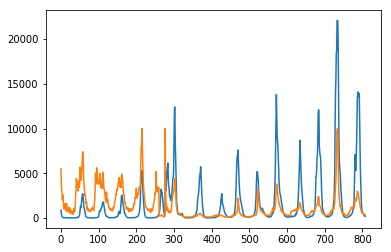

In [343]:
x=np.arange(0,809)
y=tots
plt.plot(x,y)
y=pd.Series(data['FLU_SYMP']*100)
plt.plot(x,y)

In [344]:
def derivative(y1,y2): ########### ONLY GETS DERIVATIVE OF 1 WEEK ##############
    return (y2-y1)

76


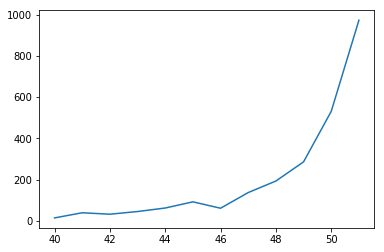

In [345]:
print(derivative(tots[46],tots[47]))
plt.plot(np.arange(40,52),tots[40:52])

In [346]:
derivs = pd.Series()
derivs_flu_symps = pd.Series()
for i in range(len(data)-1):
    derivs=derivs.append(pd.Series(derivative(tots[i],tots[i+1])))
    derivs_flu_symps=derivs_flu_symps.append(pd.Series(derivative(data['COUGH'].iloc[i],data['COUGH'].iloc[i+1])*400))
derivs.reset_index(drop=True,inplace=True)

Text(0.5, 1.0, 'First Derivative of Flu Peaks')

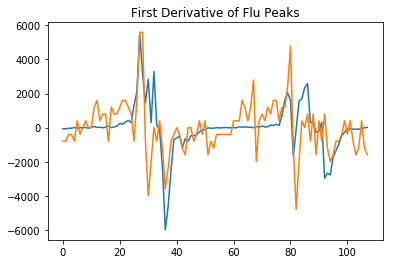

In [347]:
plt.plot(np.arange(0,len(derivs[700:])),derivs[700:])
plt.plot(np.arange(0,len(derivs_flu_symps[700:])),derivs_flu_symps[700:])
plt.title('First Derivative of Flu Peaks')

In [348]:
derivs.reset_index(drop=True,inplace=True)
derivs_flu_symps.reset_index(drop=True,inplace=True)
tot_derv = pd.concat([derivs,derivs_flu_symps],axis=1)

In [349]:
data = pd.concat([data,tot_derv],axis=1)

In [350]:
data=pd.concat([data,tots],axis=1)

In [351]:
# data['CC']=data['CC'].replace('<1',0)
# data['GRIPE']=data['GRIPE'].replace('<1',0)
# data['PREV']=data['PREV'].replace('<1',0)
# data['VACC']=data['VACC'].replace('<1',0)
# data['INF_SYMP']=data['INF_SYMP'].replace('<1',0)
# data['FLU']=data['FLU'].replace('<1',0)
# data['COUGH']=data['COUGH'].replace('<1',0)
# data['INFL']=data['INFL'].replace('<1',0)

for i in range(len(data['CC'])):
    if data['CC'].iloc[i]=='<1':
        data['CC'].iloc[i]=int(data['CC'].iloc[i])
#     if data['COUGH'].iloc[i]=='<1':
#         data['COUGH'].iloc[i]=int(data['COUGH'].iloc[i])
    data['CC'].iloc[i]=int(data['CC'].iloc[i])*4000
#     data['COUGH'].iloc[i]=int(data['COUGH'].iloc[i])*600
data.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


KeyboardInterrupt: 

In [ ]:
data = data.rename(columns={0:'total spec derv',1:'cough derv'})

In [ ]:
data['cough derv']=data['cough derv']*100

In [352]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size = 0.20, random_state = 0)
y_train = data_train['total cases']
y_val = data_val['total cases']

X_train = data_train[['cough derv']]#,'FLU','PREV','VACC','GRIPE','INF_SYMP']]
X_val = data_val[['cough derv']]#,'FLU','PREV','VACC','GRIPE','INF_SYMP']]

from sklearn.linear_model import ElasticNet

clf = ElasticNet(random_state=0,alpha = 100)
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())

train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict)}
print("Train RMSE:")
print(train_rmse)
train_compare = pd.DataFrame(train_deeta)

print("Train")
print(train_compare.head(10), "\n")

x=np.arange(0,200)
y=train_compare['true'].iloc[:200]
plt.plot(x,y)

y=train_compare['pred'].iloc[:200]
plt.plot(x,y)
# y=(data['cos'].iloc[:200]
#    +data['sines'].iloc[:200])*4-8000
# plt.plot(x,y)

KeyError: "None of [Index(['cough derv'], dtype='object')] are in the [columns]"

In [353]:
import math
sines = pd.Series(name='sine')
cos = pd.Series(name='cos')
for i in range(len(data)):
    sines=sines.append(pd.Series(math.sin(i)*2000))
    cos = cos.append(pd.Series(math.cos(i)*2000))

In [304]:
sines.reset_index(drop=True,inplace=True)
data=pd.concat([data,sines],axis=1)

In [305]:
data=data.rename(columns={0:'sines'})

In [306]:
cos.reset_index(drop=True,inplace=True)
data=pd.concat([data,cos],axis=1)
data=data.rename(columns={0:'cos'})

In [307]:
data['sines']=abs(data['sines'])

In [308]:
data['cos']=abs(data['cos'])

In [248]:
data=data.drop(['sines','cos'],axis=1)

In [337]:
from numpy import exp, array, random, dot


class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":

    #Intialise a single neuron neural network.
    neural_network = NeuralNetwork()

    print( "Random starting synaptic weights: ")
    print( neural_network.synaptic_weights)

    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = array([data['CC'].iloc[0],data['COUGH'].iloc[0],data['FLU'].iloc[0]])
    training_set_outputs = array([data['total cases'].iloc[0]]).T

    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs,10000)

    print( "New synaptic weights after training: ")
    print (neural_network.synaptic_weights)

    # Test the neural network with a new situation.
    print ("Considering new situation [1, 0, 0] -> ?: ")

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'